# **<< Improve machine performance : 기계 성능 개선 2>>**

# **1. 모듈 호출**

In [65]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

# 1. 데이터(학습/평가) 분리
from sklearn.model_selection import train_test_split


# 2. 피처 엔지니어링
# 오버샘플링 --> 타겟 데이터 불균형 해결을 위한
from imblearn.over_sampling import SMOTE   # imblearn 의 pipline을 써야함. (사이킷런의 pipline을 쓰면 잘못된 것.)
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.compose import ColumnTransformer   # 범주형 피처와 연속형 피처를 구분하여 스케일링 적용하기 위한
from sklearn.model_selection import StratifiedKFold

# 정규화 --> 연속형 피처 불균형 해결을 위한
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
# # 범주형 변수 원핫인코딩
# from sklearn.preprocessing import OneHotEncoder


# 3. (분류) 학습 모델
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


# 4. 하이퍼파라미터 튜닝
from sklearn.model_selection import GridSearchCV


# 5. 학습 검정 모델
# from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

# 6. (분류) 평가 모델
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

import warnings
warnings.filterwarnings('ignore')

# **2. 함수 만들기**

### **1) 분류 모델의 성능 검정**

In [66]:
def cross_model_validation (model, X, y, X_val, y_val) :
    """
    선정한 모델과 학습 피처, 학습 타겟값을 인자받아 
    cross_val_score를 활용한 모델 검증 함수.
    """
    
    # K-Fold Cross Validation
    cross_val_scores = cross_validate(model, X=X, y=y, cv=5, scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])

    model.fit(X, y)
    pred = model.predict(X_val)

    # 점수 
    accuracy_scores = cross_val_scores['test_accuracy']
    precision_scores = cross_val_scores['test_precision']
    recall_scores = cross_val_scores['test_recall']
    f1_scores = cross_val_scores['test_f1']
    auc_scores = cross_val_scores['test_roc_auc']


    # 각각의 지표 점수 출력
    print('<<', model, '>>')
    print('===' * 50)
    print('1. 예측 Accuracy(정확도) : {0:.4f}'.format(accuracy_score(y_val, pred)))
    print('===' * 50)
    print('2. 예측 Precision(정밀도) : {0:.4f}'.format(precision_score(y_val, pred)))
    print('===' * 50)
    print('3. 예측 Recall(재현율): {0:.4f}'.format(recall_score(y_val, pred)))
    print('===' * 50)
    print('4. 예측 F1 Score : {0:.4f}'.format(f1_score(y_val, pred)))
    print('===' * 50)
    print('5. 예측 ROC-AUC Score : {0:.4f}'.format(roc_auc_score(y_val, pred)))

### **2) 분류 모델의 평가 지표**

In [67]:
def classification_evaluation(y_test, pred=None, pred_proba=None) :
    """
    <함수 설명>
    y_test, pred, pred_proba를 입력받아 
    분류 모델의 평가 지표를 계산

    <결과>
    - confusion_matrix 
    - ('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, AUC:{4:.4f}')
    """

    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    roc_auc = roc_auc_score(y_test, pred_proba)
    
    
    print('오차 행렬')
    sns.heatmap(confusion_matrix(y_test, pred), annot=True)
    print(confusion)
    

    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

### **3) 모델 학습/예측/평가**
- Feature Engineering 후 반복적으로 모델 학습/예측/평가 작업이 수행되어야 함.
- 위에서 만든 분류모델 평가지표까지 포함함.

In [68]:
def train_pred_eval(model, X_train=None, X_test=None, y_train=None, y_test=None) :
    """
    <함수 설명>
    - 모델명과 X_train, y_train를 인자받아 학습시킴
    - 인자받은 X_test로 모델을 예측하고, 예측 확률을 구함.
    - classification_evaluation 함수를 가지고 모델을 평가함.
    """

    # 학습
    model.fit(X_train, y_train)
    # 예측
    pred = model.predict(X_test)
    # 예측 확률
    pred_proba = model.predict_proba(X_test)[:, 1]
    
    
    # 모델 평가
    classification_evaluation(y_test, pred, pred_proba)

# **3. 데이터 로드(Data Loading)**

In [69]:
Bankruptcy_org_df = pd.read_csv('data.csv')

In [70]:
print('Bankruptcy 데이터 세트 크기 :\n', 
      '(1) row 갯수 :', Bankruptcy_org_df.shape[0], '\n',
      '(2) features 갯수 :', Bankruptcy_org_df.shape[1])


# 모든 컬럼을 보디 위한 설정
pd.set_option('display.max_columns', None)

Bankruptcy_org_df = pd.read_csv('data.csv')
Bankruptcy_org_df.tail(1)

Bankruptcy 데이터 세트 크기 :
 (1) row 갯수 : 6819 
 (2) features 갯수 : 96


,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
6818,0,0.493053,0.570105,0.549548,0.627409,0.627409,0.99808,0.801987,0.8138,0.313415,0.786079,0.001432,0.0,0.427721,590000000.0,0.0,0.220766,0.220766,0.220766,0.227758,0.305793,0.000665,0.092501,0.182119,0.025316,0.848053,0.689527,0.689527,0.217605,9.350000e+09,0.000519,0.264186,0.360102,0.051348,0.040897,0.630618,0.000461,0.014149,0.985851,0.058476,0.370049,0.006368,0.092465,0.179911,0.393883,0.002999,0.000325,0.019474,19100000.0,0.0003,0.009194,0.002097,0.385767,0.000963,0.873759,0.527136,0.50501,0.238147,0.051481,0.066674,0.018517,0.239585,0.276975,0.0,1.0,0.737286,0.32669,0.0,0.938005,0.002791,0.006089,0.007864,0.008238,0.598674,0.009506,0.672096,0.005016,1.0,0.32669,0.110933,0.659917,0.483285,0.505531,0.316238,0.005579,0,0.815956,0.000707,0.62668,0.627408,0.841019,0.275114,0.026793,0.565167,1,0.233902


# **4. 범주형과 연속형 변수 나누기**

In [91]:
Bankruptcy_org_df.columns.tolist()

# 컬럼명 앞에 공백 지우기
Bankruptcy_org_df.columns = Bankruptcy_org_df.columns.str.strip()

In [92]:
# 카테고리형 변수
categorical_vars = ['Liability-Assets Flag', 'Net Income Flag']


# 연속형 변수
continuous_vars = [
    col 
    for col in Bankruptcy_org_df.columns 
    if col not in categorical_vars and col != 'Bankrupt?']


categorical = Bankruptcy_org_df[categorical_vars]
print('범주형 피처의 갯수 : ', categorical.shape[1], '개')

continuous = Bankruptcy_org_df[continuous_vars] 
print('연속형 피처의 갯수 : ', continuous.shape[1], '개')

범주형 피처의 갯수 :  2 개
연속형 피처의 갯수 :  93 개


# **5. 피처 엔지니어링(Feature Engineering)**

### **1) Oversampling - 타겟 불균형 처리**
- 학습 데이터에 대해서만
- 주의 : imblearn 의 pipline을 써야함. (사이킷런의 pipline을 쓰면 잘못된 것.)
- pipline 안에 oversample = SMOTE()

In [93]:
y_target = Bankruptcy_org_df['Bankrupt?']
X_features = Bankruptcy_org_df.drop(columns=['Bankrupt?'], axis=1)

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, stratify=y_target)

### 1. 로지스틱 회귀

In [97]:
cont_name = continuous.columns
cat_name = categorical.columns

stratified_kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
result = []

for i, (train_index, validation_index) in enumerate(stratified_kfold.split(X_train, y_train)):
    smote = SMOTE(random_state=42)
    X_train_smote, y_train_smote = smote.fit_resample(X_train.iloc[train_index], y_train.iloc[train_index])
    X_validation, y_validation = X_train.iloc[validation_index], y_train.iloc[validation_index]

    # Define the ColumnTransformer
    ct = ColumnTransformer([
        ("continuous", StandardScaler(), cont_name),
        ("categorical", 'passthrough', cat_name)
    ])

    ct.fit(X_train_smote)

    # Apply ColumnTransformer to the training and validation sets
    X_train_smote_trans = ct.transform(X_train_smote)
    X_validation_trans = ct.transform(X_validation)


    lr = LogisticRegression(random_state=42)
    param_grid = {'C': [0.001, 0.01, 0.1],
                  'max_iter': [100, 200, 300],
                  'solver': ['sag', 'saga']}

    for params in ParameterGrid(param_grid):
        lr.set_params(**params)
        lr.fit(X_train_smote_trans, y_train_smote)
        y_pred_proba = lr.predict_proba(X_validation_trans)
        y_pred = lr.predict(X_validation_trans)
        result.append([i, str(params), roc_auc_score(y_validation, y_pred_proba[:, 1]), recall_score(y_validation, y_pred)])

print('로지스틱 결과')
df_result = pd.DataFrame(result, columns=['CV#', 'params', 'roc-auc', 'recall'])
df_result[['CV#', 'roc-auc', 'recall']].groupby('CV#').mean()


로지스틱 결과


,roc-auc,recall
CV#,,
0,0.856330,0.758004
1,0.924353,0.822797
2,0.917803,0.816384


In [100]:
print('로지스틱 결과')
df_result[df_result['CV#']==1].sort_values(by=['roc-auc', 'recall'], ascending=False)

로지스틱 결과


,CV#,params,roc-auc,recall
26,1,"{'C': 0.01, 'max_iter': 200, 'solver': 'sag'}",0.926656,0.844828
28,1,"{'C': 0.01, 'max_iter': 300, 'solver': 'sag'}",0.926656,0.844828
29,1,"{'C': 0.01, 'max_iter': 300, 'solver': 'saga'}",0.926646,0.844828
24,1,"{'C': 0.01, 'max_iter': 100, 'solver': 'sag'}",0.926607,0.844828
27,1,"{'C': 0.01, 'max_iter': 200, 'solver': 'saga'}",0.926509,0.844828
25,1,"{'C': 0.01, 'max_iter': 100, 'solver': 'saga'}",0.925607,0.827586
31,1,"{'C': 0.1, 'max_iter': 100, 'solver': 'saga'}",0.925186,0.827586
30,1,"{'C': 0.1, 'max_iter': 100, 'solver': 'sag'}",0.924922,0.810345
33,1,"{'C': 0.1, 'max_iter': 200, 'solver': 'saga'}",0.924843,0.810345
35,1,"{'C': 0.1, 'max_iter': 300, 'solver': 'saga'}",0.924456,0.810345


### 2. 랜덤포레스트

In [102]:
cont_name = continuous.columns
cat_name = categorical.columns

stratified_kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
result = []

for i, (train_index, validation_index) in enumerate(stratified_kfold.split(X_train, y_train)):
    smote = SMOTE(random_state=42)
    X_train_smote, y_train_smote = smote.fit_resample(X_train.iloc[train_index], y_train.iloc[train_index])
    X_validation, y_validation = X_train.iloc[validation_index], y_train.iloc[validation_index]

    # Define the ColumnTransformer
    ct = ColumnTransformer([
        ("continuous", StandardScaler(), cont_name),
        ("categorical", 'passthrough', cat_name)
    ])

    ct.fit(X_train_smote)

    # Apply ColumnTransformer to the training and validation sets
    X_train_smote_trans = ct.transform(X_train_smote)
    X_validation_trans = ct.transform(X_validation)


    lr = RandomForestClassifier(random_state=42) 
    param_grid = {'n_estimators': [100, 150, 200],
                  'max_depth': [5, 6, 7]}

    for params in ParameterGrid(param_grid):
        lr.set_params(**params)
        lr.fit(X_train_smote_trans, y_train_smote)
        y_pred_proba = lr.predict_proba(X_validation_trans)
        y_pred = lr.predict(X_validation_trans)
        result.append([i, str(params), roc_auc_score(y_validation, y_pred_proba[:, 1]), recall_score(y_validation, y_pred)])

print('랜덤포레스트 결과')
df_result = pd.DataFrame(result, columns=['CV#', 'params', 'roc-auc', 'recall'])
df_result[['CV#', 'roc-auc', 'recall']].groupby('CV#').mean()


랜덤포레스트 결과


,roc-auc,recall
CV#,,
0,0.934720,0.800377
1,0.932919,0.775862
2,0.913407,0.774011


In [103]:
print('랜덤포레스트 결과')
df_result[df_result['CV#']==1].sort_values(by=['roc-auc', 'recall'], ascending=False)

랜덤포레스트 결과


,CV#,params,roc-auc,recall
17,1,"{'max_depth': 7, 'n_estimators': 200}",0.934737,0.758621
16,1,"{'max_depth': 7, 'n_estimators': 150}",0.934463,0.741379
15,1,"{'max_depth': 7, 'n_estimators': 100}",0.934375,0.758621
10,1,"{'max_depth': 5, 'n_estimators': 150}",0.932866,0.810345
13,1,"{'max_depth': 6, 'n_estimators': 150}",0.932759,0.775862
11,1,"{'max_depth': 5, 'n_estimators': 200}",0.932073,0.793103
14,1,"{'max_depth': 6, 'n_estimators': 200}",0.931955,0.775862
12,1,"{'max_depth': 6, 'n_estimators': 100}",0.931632,0.775862
9,1,"{'max_depth': 5, 'n_estimators': 100}",0.931407,0.793103


### 3. XGB

In [130]:
cont_name = continuous.columns
cat_name = categorical.columns

stratified_kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
result = []

for i, (train_index, validation_index) in enumerate(stratified_kfold.split(X_train, y_train)):
    smote = SMOTE(random_state=42)
    X_train_smote, y_train_smote = smote.fit_resample(X_train.iloc[train_index], y_train.iloc[train_index])
    X_validation, y_validation = X_train.iloc[validation_index], y_train.iloc[validation_index]

    # Define the ColumnTransformer
    ct = ColumnTransformer([
        ("continuous", StandardScaler(), cont_name),
        ("categorical", 'passthrough', cat_name)
    ])

    ct.fit(X_train_smote)

    # Apply ColumnTransformer to the training and validation sets
    X_train_smote_trans = ct.transform(X_train_smote)
    X_validation_trans = ct.transform(X_validation)


    lr = XGBClassifier(random_state=42)
    param_grid = {'n_estimators': [200, 300, 400, 500],
                  'learning_rate': [0.1, 0.05, 0.01]}

    for params in ParameterGrid(param_grid):
        lr.set_params(**params)
        lr.fit(X_train_smote_trans, y_train_smote)
        y_pred_proba = lr.predict_proba(X_validation_trans)
        y_pred = lr.predict(X_validation_trans)
        result.append([i, str(params), roc_auc_score(y_validation, y_pred_proba[:, 1]), recall_score(y_validation, y_pred)])

print('XGB 결과')
df_result = pd.DataFrame(result, columns=['CV#', 'params', 'roc-auc', 'recall'])
df_result[['CV#', 'roc-auc', 'recall']].groupby('CV#').mean()

XGB 결과


,roc-auc,recall
CV#,,
0,0.918246,0.440678
1,0.940638,0.587644
2,0.911513,0.532486


In [106]:
print('XGB 결과')
df_result[df_result['CV#']==1].sort_values(by=['roc-auc', 'recall'], ascending=False)

XGB 결과


,CV#,params,roc-auc,recall
16,1,"{'learning_rate': 0.05, 'n_estimators': 200}",0.944837,0.620690
17,1,"{'learning_rate': 0.05, 'n_estimators': 300}",0.944357,0.568966
18,1,"{'learning_rate': 0.05, 'n_estimators': 400}",0.943907,0.534483
12,1,"{'learning_rate': 0.1, 'n_estimators': 200}",0.943133,0.586207
19,1,"{'learning_rate': 0.05, 'n_estimators': 500}",0.942555,0.517241
13,1,"{'learning_rate': 0.1, 'n_estimators': 300}",0.941262,0.500000
23,1,"{'learning_rate': 0.01, 'n_estimators': 500}",0.940948,0.655172
15,1,"{'learning_rate': 0.1, 'n_estimators': 500}",0.940674,0.517241
14,1,"{'learning_rate': 0.1, 'n_estimators': 400}",0.940498,0.500000
22,1,"{'learning_rate': 0.01, 'n_estimators': 400}",0.939704,0.689655


### 4. LGBM

In [107]:
cont_name = continuous.columns
cat_name = categorical.columns

stratified_kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
result = []

for i, (train_index, validation_index) in enumerate(stratified_kfold.split(X_train, y_train)):
    smote = SMOTE(random_state=42)
    X_train_smote, y_train_smote = smote.fit_resample(X_train.iloc[train_index], y_train.iloc[train_index])
    X_validation, y_validation = X_train.iloc[validation_index], y_train.iloc[validation_index]

    # Define the ColumnTransformer
    ct = ColumnTransformer([
        ("continuous", StandardScaler(), cont_name),
        ("categorical", 'passthrough', cat_name)
    ])

    ct.fit(X_train_smote)

    # Apply ColumnTransformer to the training and validation sets
    X_train_smote_trans = ct.transform(X_train_smote)
    X_validation_trans = ct.transform(X_validation)


    lr = LGBMClassifier(random_state=42)
    param_grid = {'n_estimators': [200, 300, 400, 500],
                  'learning_rate': [0.1, 0.05, 0.01],
                  'max_depth': [100, 200, 300],
                  'num_leaves': [15, 20, 31]}

    for params in ParameterGrid(param_grid):
        lr.set_params(**params)
        lr.fit(X_train_smote_trans, y_train_smote)
        y_pred_proba = lr.predict_proba(X_validation_trans)
        y_pred = lr.predict(X_validation_trans)
        result.append([i, str(params), roc_auc_score(y_validation, y_pred_proba[:, 1]), recall_score(y_validation, y_pred)])

print('LGBM 결과')
df_result = pd.DataFrame(result, columns=['CV#', 'params', 'roc-auc', 'recall'])
df_result[['CV#', 'roc-auc', 'recall']].groupby('CV#').mean()

LGBM 결과


,roc-auc,recall
CV#,,
0,0.917122,0.453390
1,0.952305,0.602969
2,0.924318,0.536723


In [110]:
df_result['params']

0      {'learning_rate': 0.1, 'max_depth': 100, 'n_es...
1      {'learning_rate': 0.1, 'max_depth': 100, 'n_es...
2      {'learning_rate': 0.1, 'max_depth': 100, 'n_es...
3      {'learning_rate': 0.1, 'max_depth': 100, 'n_es...
4      {'learning_rate': 0.1, 'max_depth': 100, 'n_es...
                             ...                        
319    {'learning_rate': 0.01, 'max_depth': 300, 'n_e...
320    {'learning_rate': 0.01, 'max_depth': 300, 'n_e...
321    {'learning_rate': 0.01, 'max_depth': 300, 'n_e...
322    {'learning_rate': 0.01, 'max_depth': 300, 'n_e...
323    {'learning_rate': 0.01, 'max_depth': 300, 'n_e...
Name: params, Length: 324, dtype: object

In [124]:
pd.set_option('display.max_colwidth', 300)
print('LGBM 결과')

df_result[df_result['CV#']==1].sort_values(by=['roc-auc', 'recall'], ascending=False)

LGBM 결과


,CV#,params,roc-auc,recall
145,1,"{'learning_rate': 0.05, 'max_depth': 100, 'n_estimators': 200, 'num_leaves': 20}",0.957181,0.603448
157,1,"{'learning_rate': 0.05, 'max_depth': 200, 'n_estimators': 200, 'num_leaves': 20}",0.957181,0.603448
169,1,"{'learning_rate': 0.05, 'max_depth': 300, 'n_estimators': 200, 'num_leaves': 20}",0.957181,0.603448
144,1,"{'learning_rate': 0.05, 'max_depth': 100, 'n_estimators': 200, 'num_leaves': 15}",0.956720,0.620690
156,1,"{'learning_rate': 0.05, 'max_depth': 200, 'n_estimators': 200, 'num_leaves': 15}",0.956720,0.620690
...,...,...,...,...
197,1,"{'learning_rate': 0.01, 'max_depth': 200, 'n_estimators': 300, 'num_leaves': 31}",0.943348,0.689655
209,1,"{'learning_rate': 0.01, 'max_depth': 300, 'n_estimators': 300, 'num_leaves': 31}",0.943348,0.689655
182,1,"{'learning_rate': 0.01, 'max_depth': 100, 'n_estimators': 200, 'num_leaves': 31}",0.942741,0.706897
194,1,"{'learning_rate': 0.01, 'max_depth': 200, 'n_estimators': 200, 'num_leaves': 31}",0.942741,0.706897


# **6. 모델 성능 평가**


<< 2차 로지스틱 회귀(Logistic Regression) 결과 >>

오차 행렬
[[1580  179]
 [   9   50]]
정확도: 0.8966, 정밀도: 0.2183, 재현율: 0.8475,    F1: 0.3472, AUC:0.9287


'\n<< 1차 로지스틱 회귀(Logistic Regression) 결과 >>\n\n오차 행렬\n[[1309    4]\n [  38   13]]\n정확도: 0.9692, 정밀도: 0.7647, 재현율: 0.2549,    F1: 0.3824, AUC:0.9382\n'

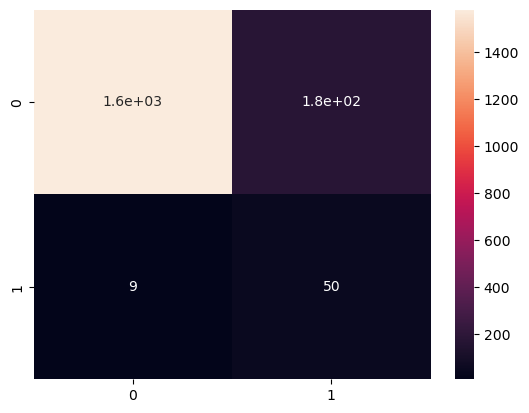

In [101]:
print('\n<< 2차 로지스틱 회귀(Logistic Regression) 결과 >>\n')
lr_clf = LogisticRegression(C=0.01, max_iter=200, solver='sag', random_state=42)
train_pred_eval(lr_clf, X_train_smote_trans, X_validation_trans, y_train_smote, y_validation)

'''
<< 1차 로지스틱 회귀(Logistic Regression) 결과 >>

오차 행렬
[[1309    4]
 [  38   13]]
정확도: 0.9692, 정밀도: 0.7647, 재현율: 0.2549,    F1: 0.3824, AUC:0.9382
'''


<< 2차 랜덤포레스트(RandomForestClassifier) 결과 >>

오차 행렬
[[1631  128]
 [  14   45]]
정확도: 0.9219, 정밀도: 0.2601, 재현율: 0.7627,    F1: 0.3879, AUC:0.9155


'\n<< 1차 랜덤포레스트(RandomForestClassifier) 결과 >>\n\n오차 행렬\n[[1313    0]\n [  45    6]]\n정확도: 0.9670, 정밀도: 1.0000, 재현율: 0.1176,    F1: 0.2105, AUC:0.9278\n'

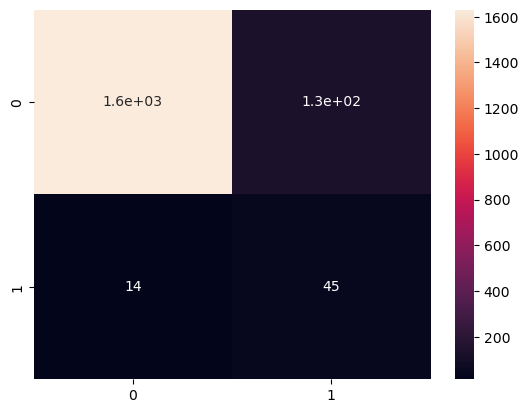

In [104]:
print('\n<< 2차 랜덤포레스트(RandomForestClassifier) 결과 >>\n')
rf_clf = RandomForestClassifier(n_estimators=200, max_depth=7, random_state=42) 
train_pred_eval(rf_clf, X_train_smote_trans, X_validation_trans, y_train_smote, y_validation)

'''
<< 1차 랜덤포레스트(RandomForestClassifier) 결과 >>

오차 행렬
[[1313    0]
 [  45    6]]
정확도: 0.9670, 정밀도: 1.0000, 재현율: 0.1176,    F1: 0.2105, AUC:0.9278
'''


<< 2차 XGBoost 결과 >>

[13:15:20] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_leaves" } are not used.

오차 행렬
[[1721   38]
 [  34   25]]
정확도: 0.9604, 정밀도: 0.3968, 재현율: 0.4237,    F1: 0.4098, AUC:0.9178


'\n<< 1차 XGBoost 결과 >>\n\n오차 행렬\n[[1306    7]\n [  40   11]]\n정확도: 0.9655, 정밀도: 0.6111, 재현율: 0.2157,    F1: 0.3188, AUC:0.9238\n'

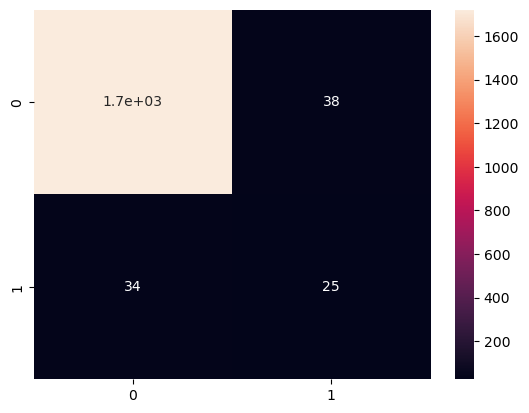

In [125]:
print('\n<< 2차 XGBoost 결과 >>\n')
xgb_clf = XGBClassifier(n_estimators=200, learning_rate=0.05, random_state=42)
train_pred_eval(xgb_clf, X_train_smote, X_validation, y_train_smote, y_validation)

'''
<< 1차 XGBoost 결과 >>

오차 행렬
[[1306    7]
 [  40   11]]
정확도: 0.9655, 정밀도: 0.6111, 재현율: 0.2157,    F1: 0.3188, AUC:0.9238
'''


<< 2차 LightGBM 결과 >>

오차 행렬
[[1715   44]
 [  28   31]]
정확도: 0.9604, 정밀도: 0.4133, 재현율: 0.5254,    F1: 0.4627, AUC:0.9306


'\n<< 1차 LightGBM 결과 >>\n\n오차 행렬\n[[1308    5]\n [  36   15]]\n정확도: 0.9699, 정밀도: 0.7500, 재현율: 0.2941,    F1: 0.4225, AUC:0.9440\n'

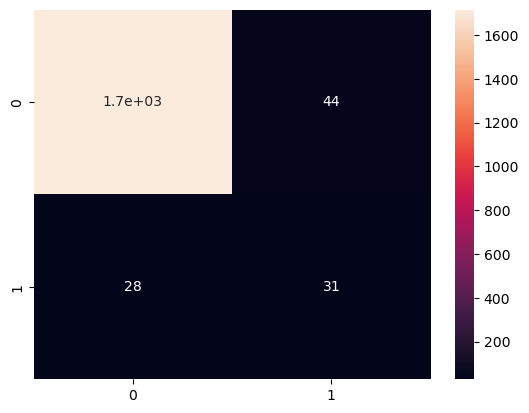

In [129]:
print('\n<< 2차 LightGBM 결과 >>\n')
lgbm_clf = LGBMClassifier(n_estimators=200, learning_rate=0.05, max_depth=100, num_leaves=20, random_state=42)
train_pred_eval(lgbm_clf, X_train_smote, X_validation, y_train_smote, y_validation)

'''
<< 1차 LightGBM 결과 >>

오차 행렬
[[1308    5]
 [  36   15]]
정확도: 0.9699, 정밀도: 0.7500, 재현율: 0.2941,    F1: 0.4225, AUC:0.9440
'''

<<오버샘플링 및 스케일링 적용 후 모델 성능 평가의 결과>>
- 1. 로지스틱 -->  정확도: 0.8966, 정밀도: 0.2183, 재현율: 0.8475,    F1: 0.3472, AUC:0.9287
- 2. 랜덤포레스트 --> 정확도: 0.9219, 정밀도: 0.2601, 재현율: 0.7627,    F1: 0.3879, AUC:0.9155
- 3. XGB --> 정확도: 0.9604, 정밀도: 0.3968, 재현율: 0.4237,    F1: 0.4098, AUC:0.9178
- 4. LGBM --> 정확도: 0.9604, 정밀도: 0.4133, 재현율: 0.5254,    F1: 0.4627, AUC:0.9306